In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df['conversion'] = df['y'].apply(lambda x: 1 if x=='yes' else 0)

In [20]:
pd.DataFrame(pd.pivot_table(df,index='job',values='pdays',columns='marital',aggfunc='count'))

marital,divorced,married,single,unknown
job,,,,
admin.,1280,5253,3875,14
blue-collar,728,6687,1825,14
entrepreneur,179,1071,203,3
housemaid,161,777,119,3
management,331,2089,501,3
retired,348,1274,93,5
self-employed,133,904,379,5
services,532,2294,1137,6
student,9,41,824,1


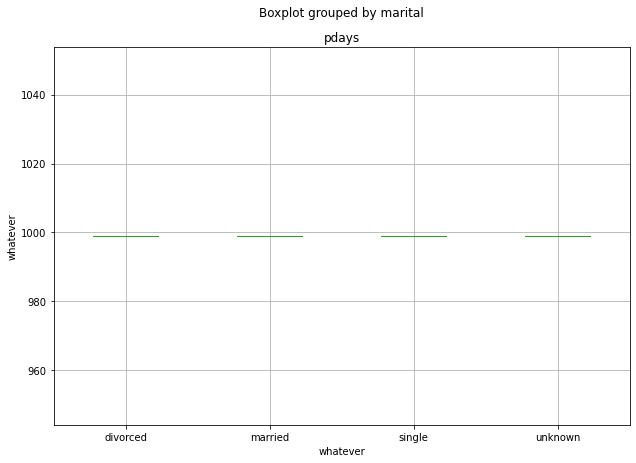

In [26]:
ax = df[['marital','pdays']].boxplot(
    by='marital',
    showfliers = False
    ,
    figsize=(10,7)
)
ax.set_xlabel('whatever')
ax.set_ylabel('whatever')

plt.show()

In [36]:
df.describe(percentiles=[0.10,.20,.30,.40,.50, .60, 0.70, 0.80, .90],)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,conversion
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
10%,28.00000,59.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,1.046000,5076.200000,0.000000
20%,31.00000,89.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,1.299000,5099.100000,0.000000
30%,33.00000,116.000000,1.000000,999.000000,0.000000,-1.700000,93.200000,-42.700000,1.410000,5099.100000,0.000000
40%,35.00000,146.000000,1.000000,999.000000,0.000000,-0.100000,93.444000,-42.000000,4.191000,5191.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
60%,41.00000,222.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-40.000000,4.864000,5195.800000,0.000000


In [12]:
job_code, job_title = df['job'].factorize()


In [35]:


job_order = ['unemployed','student', 'unknown', 'housemaid', 'retired','technician', 'blue-collar',  'self-employed',  'entrepreneur', 'services','admin.','management' ]
pd.Categorical(df['job'], job_order)

['housemaid', 'services', 'services', 'admin.', 'services', ..., 'retired', 'blue-collar', 'retired', 'technician', 'retired']
Length: 41188
Categories (12, object): ['unemployed', 'student', 'unknown', 'housemaid', ..., 'entrepreneur', 'services', 'admin.', 'management']

In [22]:
df['y'].factorize()

(array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 Index(['no', 'yes'], dtype='object'))